In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler

In [109]:
# STEP 1: Load dan bersihkan data
data = pd.read_csv("databener.csv")
data = data.drop(columns=['District_Name', 'Link'])

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Soil_color   4513 non-null   object 
 1   Nitrogen     4513 non-null   int64  
 2   Phosphorus   4513 non-null   int64  
 3   Potassium    4513 non-null   int64  
 4   pH           4513 non-null   float64
 5   Rainfall     4513 non-null   int64  
 6   Temperature  4513 non-null   int64  
 7   Crop         4513 non-null   object 
 8   Fertilizer   4513 non-null   object 
dtypes: float64(1), int64(5), object(3)
memory usage: 317.4+ KB


In [111]:
# Cek nilai null
print(data.isnull().sum())

Soil_color     0
Nitrogen       0
Phosphorus     0
Potassium      0
pH             0
Rainfall       0
Temperature    0
Crop           0
Fertilizer     0
dtype: int64


In [112]:
print(data.isna().sum())

Soil_color     0
Nitrogen       0
Phosphorus     0
Potassium      0
pH             0
Rainfall       0
Temperature    0
Crop           0
Fertilizer     0
dtype: int64


In [113]:
# Cek baris yang duplikat
duplikat = data.duplicated()

# Jumlah baris yang duplikat
print(f"Jumlah baris duplikat: {duplikat.sum()}")

Jumlah baris duplikat: 0


In [114]:
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


In [115]:
print("fertilizer unik: ", data['Fertilizer'].unique())
print("Crop unik: ",data['Crop'].unique())
print("soil color unik: ",data['Soil_color'].unique())
#kayanya nama pupuknya perlu kita ganti deh, jadi yg lebih gampang dibaca

fertilizer unik:  ['Urea' 'DAP' 'MOP' '10:26:26 NPK' 'SSP' 'Magnesium Sulphate'
 '13:32:26 NPK' '12:32:16 NPK' '50:26:26 NPK' '19:19:19 NPK'
 'Chilated Micronutrient' '18:46:00 NPK' 'Sulphur' '20:20:20 NPK'
 'Ammonium Sulphate' 'Ferrous Sulphate' 'White Potash' '10:10:10 NPK'
 'Hydrated Lime']
Crop unik:  ['Sugarcane' 'Jowar' 'Cotton' 'Rice' 'Wheat' 'Groundnut' 'Maize' 'Tur'
 'Urad' 'Moong' 'Gram' 'Masoor' 'Soybean' 'Ginger' 'Turmeric' 'Grapes']
soil color unik:  ['Black' 'Red ' 'Medium Brown' 'Dark Brown' 'Red' 'Light Brown'
 'Reddish Brown']


In [116]:
numerical_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']
categorical_features = ['Soil_color', 'Crop', 'Fertilizer']

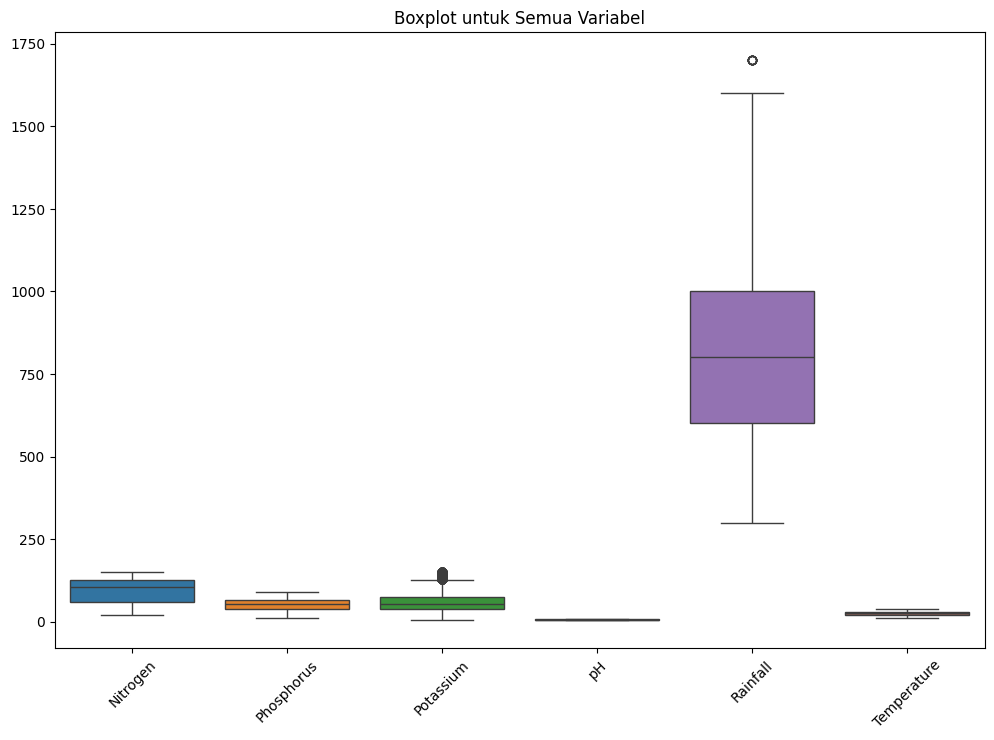

In [117]:
# identifikasi outliers
# hanya pada data numerik
# Membuat boxplot untuk semua variabel
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_features])
plt.title("Boxplot untuk Semua Variabel")
plt.xticks(rotation=45)  # Jika nama variabel terlalu panjang
plt.show()

In [118]:
#normalisasi pake min-max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data2 = scaler.fit_transform(data[numerical_features])
data2 = pd.DataFrame(data2, columns=data[numerical_features].columns)

# Gabungkan kembali kolom kategorik dengan data yang telah dinormalisasi
data3 = pd.concat([data2, data[categorical_features].reset_index(drop=True)], axis=1)

In [119]:
data3.head(10)

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Soil_color,Crop,Fertilizer
0,0.423077,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
1,0.461538,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
2,0.500000,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
3,0.538462,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
4,0.576923,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
5,0.615385,0.5000,0.655172,0.333333,0.500000,0.333333,Black,Sugarcane,Urea
6,0.423077,0.5625,0.689655,0.500000,0.571429,0.500000,Black,Sugarcane,Urea
7,0.461538,0.5625,0.689655,0.500000,0.571429,0.500000,Black,Sugarcane,Urea
8,0.500000,0.5625,0.689655,0.500000,0.571429,0.500000,Black,Sugarcane,Urea
9,0.538462,0.5625,0.689655,0.500000,0.571429,0.500000,Black,Sugarcane,Urea


In [120]:
data3.to_csv("data_sebelum_pca.csv")

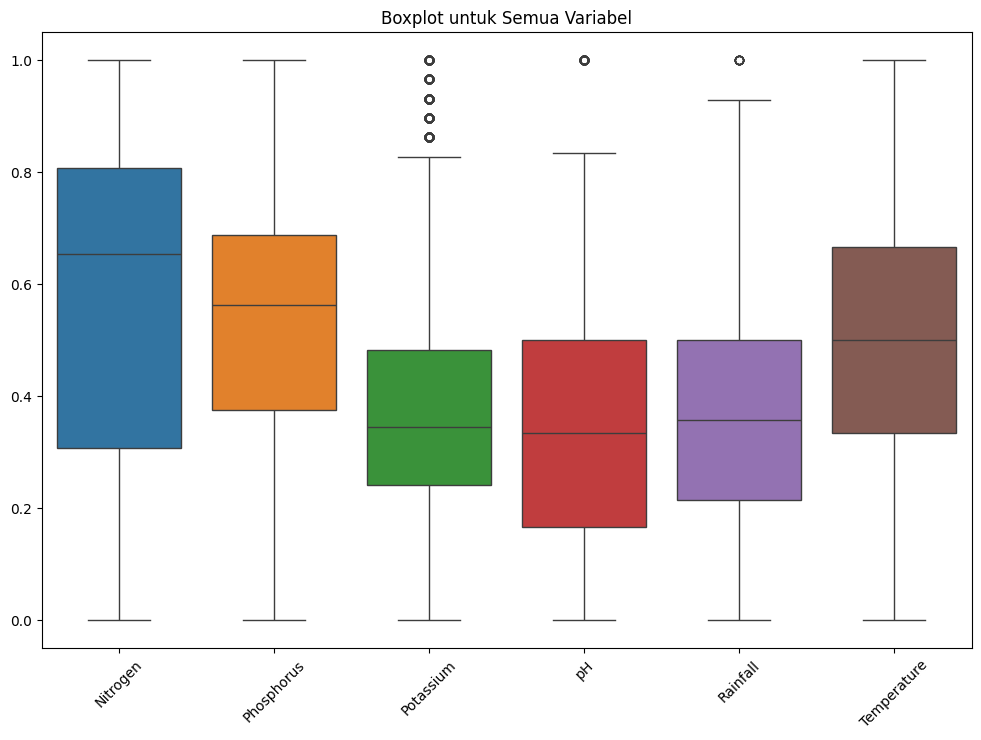

In [121]:
#identifikasi outliers
# Membuat boxplot untuk semua variabel
plt.figure(figsize=(12, 8))
sns.boxplot(data=data3)
plt.title("Boxplot untuk Semua Variabel")
plt.xticks(rotation=45)  # Jika nama variabel terlalu panjang
plt.show()

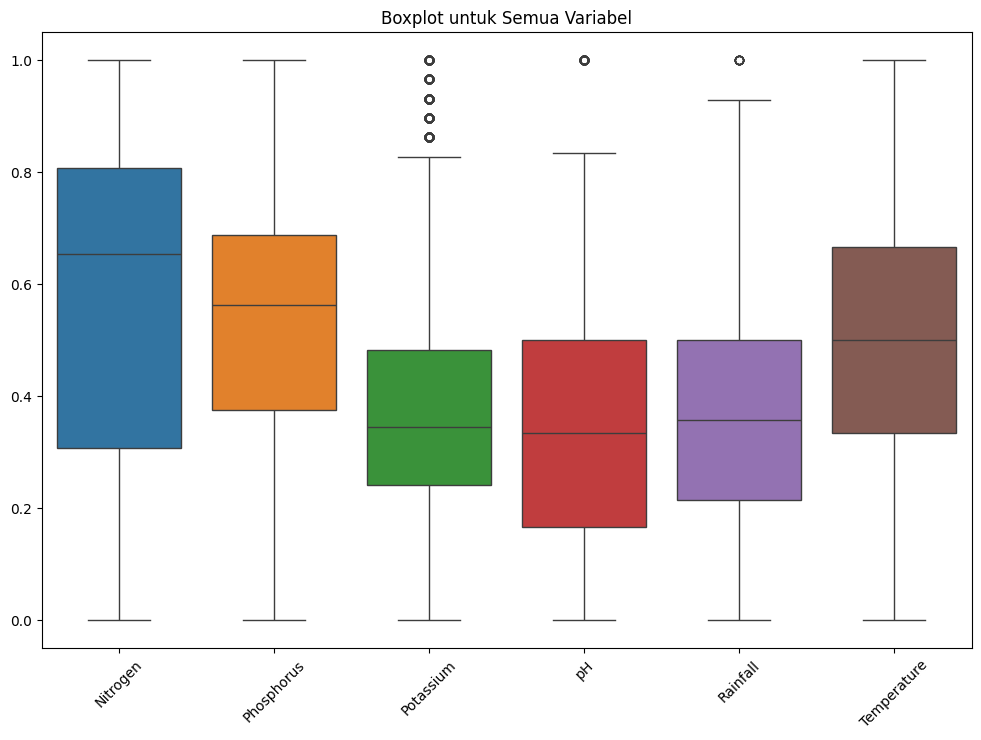

In [122]:
#identifikasi outliers
# Membuat boxplot untuk semua variabel
plt.figure(figsize=(12, 8))
sns.boxplot(data=data3)
plt.title("Boxplot untuk Semua Variabel")
plt.xticks(rotation=45)  # Jika nama variabel terlalu panjang
plt.show()

In [123]:
# Kolom yang akan diproses
columns_to_check = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']

data4 = data2.copy()

# Loop untuk menghitung IQR dan menangani outliers
for col in columns_to_check:
    # Hitung Q1, Q3, dan IQR
    Q1 = data4[col].quantile(0.25)
    Q3 = data4[col].quantile(0.75)
    IQR = Q3 - Q1

    # Hitung batas bawah dan atas
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Lakukan capping untuk outliers
    data4[col] = data4[col].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)

# Tampilkan data tanpa outliers
print(data4)

      Nitrogen  Phosphorus  Potassium        pH  Rainfall  Temperature
0     0.423077       0.500   0.655172  0.333333  0.500000     0.333333
1     0.461538       0.500   0.655172  0.333333  0.500000     0.333333
2     0.500000       0.500   0.655172  0.333333  0.500000     0.333333
3     0.538462       0.500   0.655172  0.333333  0.500000     0.333333
4     0.576923       0.500   0.655172  0.333333  0.500000     0.333333
...        ...         ...        ...       ...       ...          ...
4508  0.846154       0.875   0.844828  0.500000  0.785714     0.666667
4509  0.884615       0.875   0.844828  0.500000  0.785714     0.666667
4510  0.923077       0.875   0.844828  0.500000  0.785714     0.666667
4511  0.961538       0.875   0.844828  0.500000  0.785714     0.666667
4512  1.000000       0.875   0.844828  0.500000  0.785714     0.666667

[4513 rows x 6 columns]


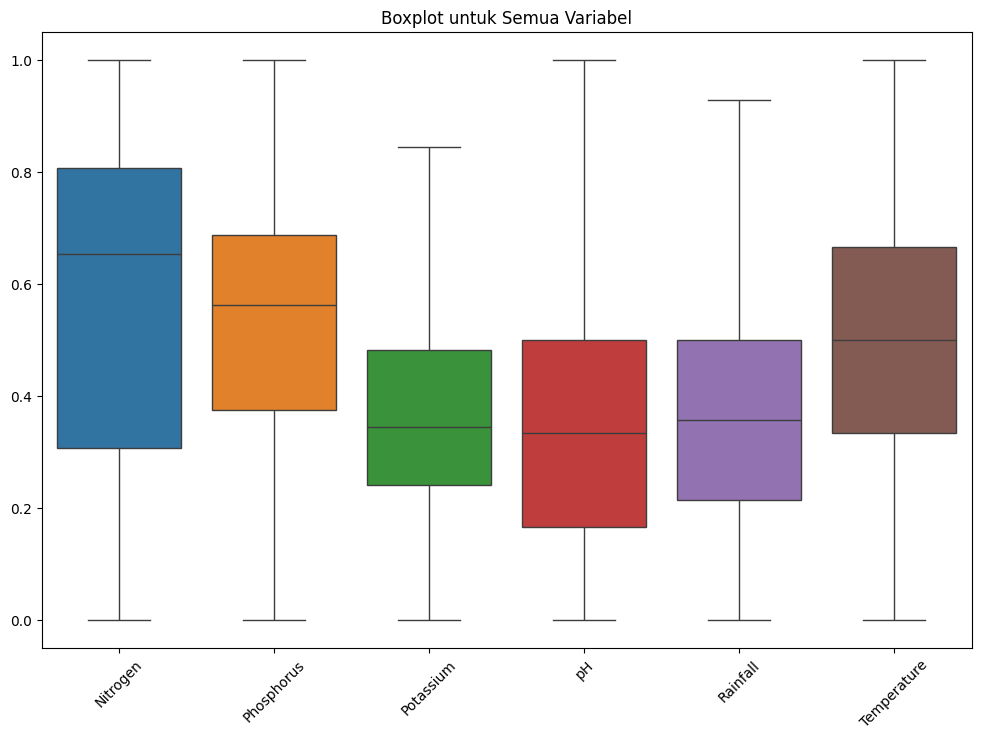

In [124]:
#identifikasi outliers
# Membuat boxplot untuk semua variabel
plt.figure(figsize=(12, 8))
sns.boxplot(data=data4)
plt.title("Boxplot untuk Semua Variabel")
plt.xticks(rotation=45)  # Jika nama variabel terlalu panjang
plt.show()

Analisis Univariate untuk Fitur: Soil_color
               jumlah sampel  persentase
Soil_color                              
Black                   2260        50.1
Red                      744        16.5
Dark Brown               659        14.6
Red                      480        10.6
Reddish Brown            265         5.9
Light Brown               54         1.2
Medium Brown              51         1.1


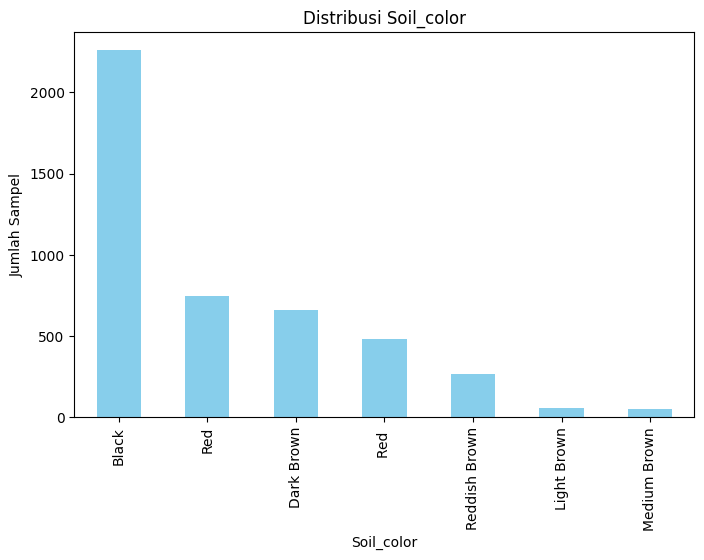

Analisis Univariate untuk Fitur: Crop
           jumlah sampel  persentase
Crop                                
Sugarcane           1010        22.4
Wheat                859        19.0
Cotton               650        14.4
Jowar                394         8.7
Maize                350         7.8
Rice                 309         6.8
Groundnut            177         3.9
Tur                  126         2.8
Grapes               125         2.8
Ginger               125         2.8
Urad                  99         2.2
Moong                 99         2.2
Gram                  78         1.7
Turmeric              55         1.2
Soybean               45         1.0
Masoor                12         0.3


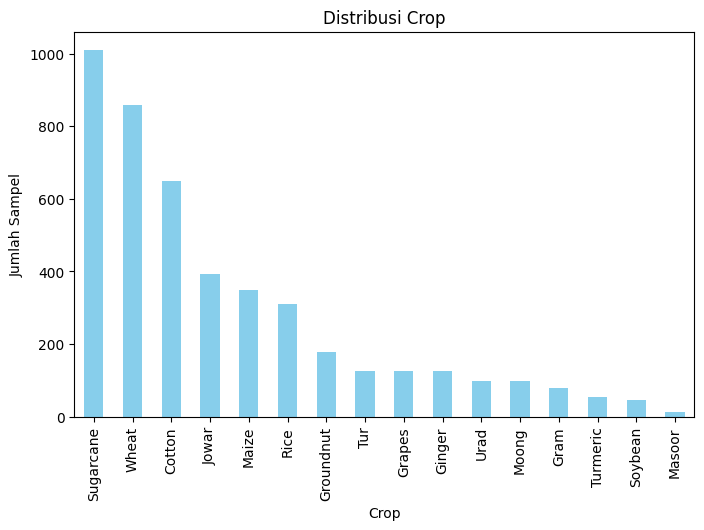

Analisis Univariate untuk Fitur: Fertilizer
                        jumlah sampel  persentase
Fertilizer                                       
Urea                             1364        30.2
DAP                               667        14.8
MOP                               571        12.7
19:19:19 NPK                      480        10.6
SSP                               417         9.2
Magnesium Sulphate                215         4.8
10:26:26 NPK                      156         3.5
50:26:26 NPK                      124         2.7
Chilated Micronutrient            108         2.4
12:32:16 NPK                      106         2.3
Ferrous Sulphate                   68         1.5
13:32:26 NPK                       66         1.5
Ammonium Sulphate                  50         1.1
10:10:10 NPK                       50         1.1
Hydrated Lime                      25         0.6
White Potash                       19         0.4
20:20:20 NPK                       15         0.3
18:46:

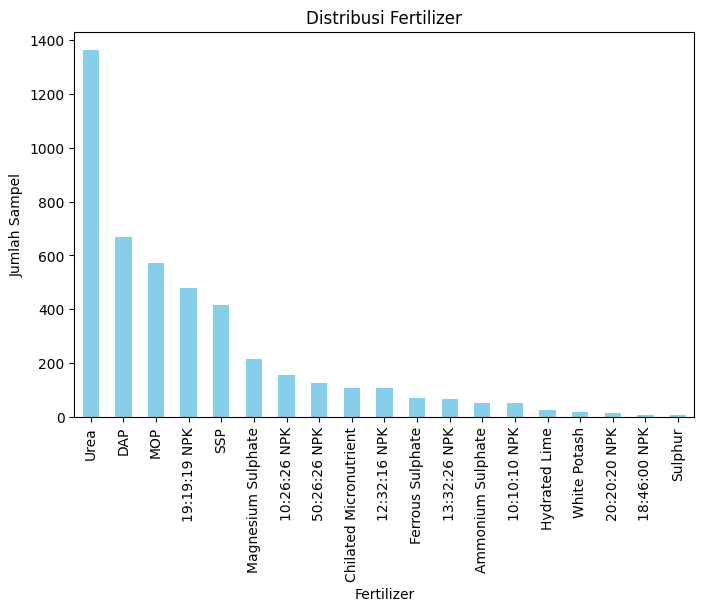

In [125]:
# Analisis univariate untuk fitur kategorikal
for feature in categorical_features:
    count = data3[feature].value_counts()
    percent = 100 * data3[feature].value_counts(normalize=True)
    df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"Analisis Univariate untuk Fitur: {feature}")
    print(df)

    # Visualisasi distribusi fitur kategorikal
    count.plot(kind='bar', title=f"Distribusi {feature}", color='skyblue', figsize=(8, 5))
    plt.ylabel("Jumlah Sampel")
    plt.show()

In [104]:
# Oversampling untuk menangani ketidakseimbangan data
# 1. Pisahkan fitur dan label
X = data4
y = data[['Crop', 'Fertilizer']]

# 2. Gabungkan target menjadi satu label string
y_combined_str = y['Crop'].astype(str) + '_' + y['Fertilizer'].astype(str)

# 3. Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled_str = ros.fit_resample(X, y_combined_str)

# 4. Pecah kembali menjadi dua kolom label
y_resampled_df = y_resampled_str.str.split('_', expand=True)
y_resampled_df.columns = ['Crop', 'Fertilizer']

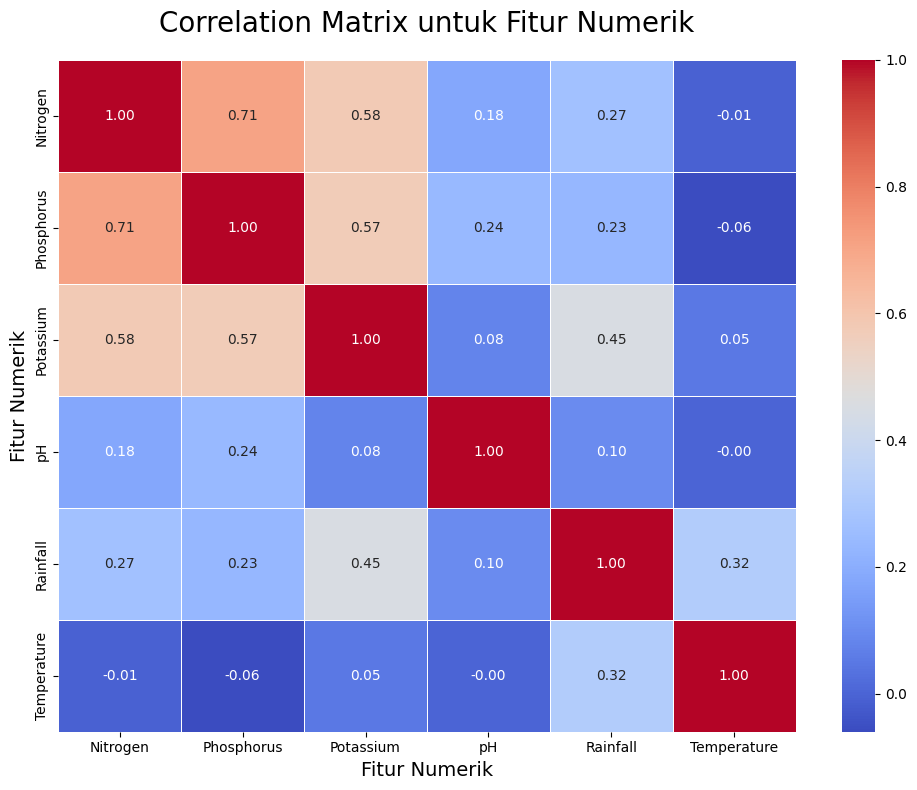

In [126]:
#matriks korelasi

plt.figure(figsize=(10, 8))
correlation_matrix = data3[numerical_features].corr().round(2)

# Membuat heatmap dengan parameter tambahan
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",  # Format angka 2 desimal
    annot_kws={"size": 10}  # Ukuran angka dalam kotak
)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20, pad=20)
plt.xlabel("Fitur Numerik", fontsize=14)
plt.ylabel("Fitur Numerik", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()  # Menyesuaikan layout agar tidak terpotong
plt.show()

In [127]:
# PCA setelah oversampling
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_resampled)

In [128]:
# Membuat DataFrame untuk hasil PCA
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
data_pca = pd.DataFrame(X_pca, columns=pca_columns)
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,0.238019,0.248988,-0.149247,-0.252166,0.066322
1,0.265538,0.238625,-0.156894,-0.238984,0.057222
2,0.293057,0.228263,-0.164541,-0.225801,0.048122
3,0.320576,0.217900,-0.172188,-0.212619,0.039022
4,0.348094,0.207538,-0.179835,-0.199436,0.029922


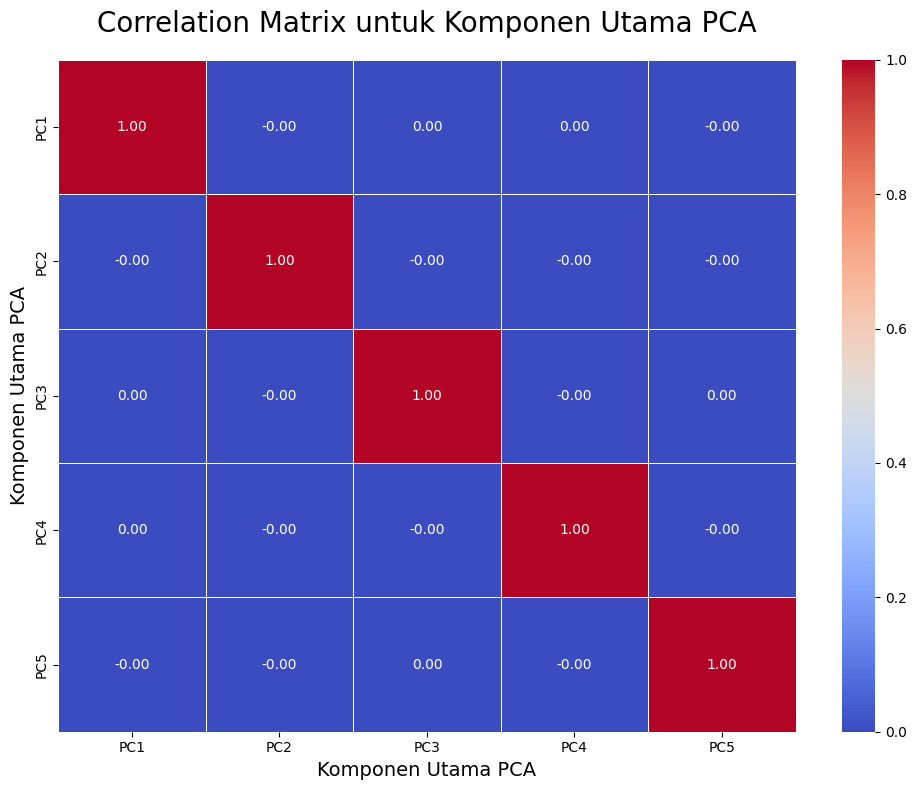

In [129]:
# Membuat matriks korelasi hanya untuk kolom hasil PCA
correlation_matrix = data_pca[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']].corr().round(2)

# Plotting heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5,
    fmt=".2f",
    annot_kws={"size": 10}
)
plt.title("Correlation Matrix untuk Komponen Utama PCA", size=20, pad=20)
plt.xlabel("Komponen Utama PCA", fontsize=14)
plt.ylabel("Komponen Utama PCA", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [130]:
data_pca.to_csv('data_pca.csv', index=False)

In [131]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled_df, test_size=0.2, random_state=42)

# Model training
rf_model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
rf_model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [132]:
# Evaluasi
y_pred = rf_model.predict(X_test)
y_pred_df = pd.DataFrame(y_pred, columns=['Predicted_Crop', 'Predicted_Fertilizer'])

# Akurasi
print("Akurasi Prediksi Crop:", accuracy_score(y_test['Crop'], y_pred_df['Predicted_Crop']))
print("Akurasi Prediksi Fertilizer:", accuracy_score(y_test['Fertilizer'], y_pred_df['Predicted_Fertilizer']))


Akurasi Prediksi Crop: 0.995697463768116
Akurasi Prediksi Fertilizer: 0.9506340579710145


In [ ]:
#akurasi fertilizer lebih baik setelah datanya dioversampling

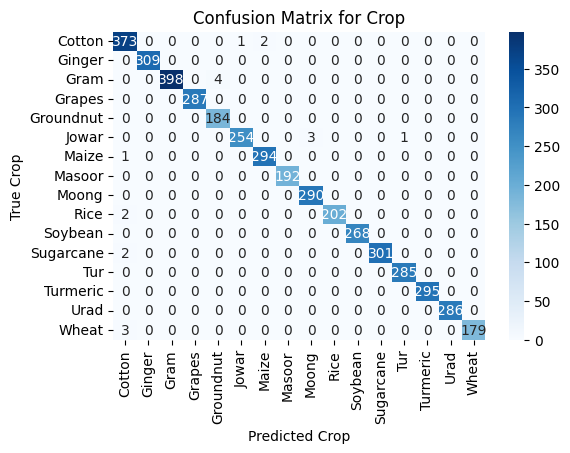

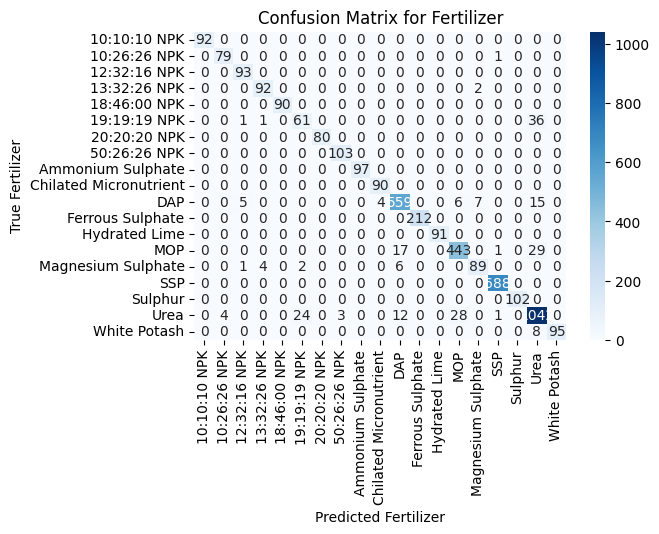

Classification Report for Crop:
              precision    recall  f1-score   support

      Cotton       0.98      0.99      0.99       376
      Ginger       1.00      1.00      1.00       309
        Gram       1.00      0.99      0.99       402
      Grapes       1.00      1.00      1.00       287
   Groundnut       0.98      1.00      0.99       184
       Jowar       1.00      0.98      0.99       258
       Maize       0.99      1.00      0.99       295
      Masoor       1.00      1.00      1.00       192
       Moong       0.99      1.00      0.99       290
        Rice       1.00      0.99      1.00       204
     Soybean       1.00      1.00      1.00       268
   Sugarcane       1.00      0.99      1.00       303
         Tur       1.00      1.00      1.00       285
    Turmeric       1.00      1.00      1.00       295
        Urad       1.00      1.00      1.00       286
       Wheat       1.00      0.98      0.99       182

    accuracy                           1.00     

In [135]:
# Confusion Matrix Crop
cm_crop = confusion_matrix(y_test['Crop'], y_pred_df['Predicted_Crop'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_crop, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y['Crop']), yticklabels=np.unique(y['Crop']))
plt.xlabel('Predicted Crop')
plt.ylabel('True Crop')
plt.title('Confusion Matrix for Crop')
plt.show()

# Confusion Matrix Fertilizer
cm_fertilizer = confusion_matrix(y_test['Fertilizer'], y_pred_df['Predicted_Fertilizer'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm_fertilizer, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y['Fertilizer']), yticklabels=np.unique(y['Fertilizer']))
plt.xlabel('Predicted Fertilizer')
plt.ylabel('True Fertilizer')
plt.title('Confusion Matrix for Fertilizer')
plt.show()
print("Classification Report for Crop:")
print(classification_report(y_test['Crop'], y_pred_df['Predicted_Crop']))

print("Classification Report for Fertilizer:")
print(classification_report(y_test['Fertilizer'], y_pred_df['Predicted_Fertilizer']))


In [133]:
def predict_new_data(nitrogen, phosphorus, potassium, ph, rainfall, temperature):
    # Masukkan data sebagai array
    new_data = np.array([[nitrogen, phosphorus, potassium, ph, rainfall, temperature]])
    # Scaling
    new_data_scaled = scaler.transform(new_data)
    # PCA transform
    new_data_pca = pca.transform(new_data_scaled)
    # Prediksi
    prediction = rf_model.predict(new_data_pca)
    return prediction[0]  # [Crop, Fertilizer]

In [134]:
hasil = predict_new_data(
    nitrogen=200,
    phosphorus=15,
    potassium=30,
    ph=6.5,
    rainfall=100,
    temperature=25
)
print("Hasil Prediksi Crop dan Fertilizer:", hasil)

Hasil Prediksi Crop dan Fertilizer: ['Maize' 'MOP']


C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
